In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the file path
file_path = r'C:\Users\todd-\OneDrive\Desktop\todd\Excel Templates\Shop_Sales_DB-No VBA.csv'

# Read the CSV file into a DataFrame with the specified encoding
df = pd.read_csv(file_path, encoding='latin1')  

# Display the first 10 rows of the DataFrame
df_head = df.head()

# Display the first few rows of the DataFrame for testing
print(df.head())

   Unique_ID Order Date O.Month       Sales Person   Region         Category  \
0          1   1/1/2024     Jan       David Wilson     East        Furniture   
1          2   1/1/2024     Jan      Sophia Martin     West        Furniture   
2          3   1/1/2024     Jan   Jessica Martinez  Central  Office Supplies   
3          4   1/1/2024     Jan     James Anderson  Central  Office Supplies   
4          5   1/1/2024     Jan     Kelly Williams  Central        Furniture   

  Sub-Category                                       Product Name    Sales  \
0  Furnishings                 Linden 10" Round Wall Clock, Black   48.896   
1  Furnishings  Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430   
2      Binders            Wilson Jones Easy Flow II Sheet Lifters    3.600   
3      Storage                      SAFCO Boltless Steel Shelving  454.560   
4  Furnishings  Tenex Carpeted, Granite-Look or Clear Contempo...  141.420   

   Quantity  ...  Price per unit Product Cost  Net

In [61]:
df_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unique_ID                 5 non-null      int64  
 1   Order Date                5 non-null      object 
 2   O.Month                   5 non-null      object 
 3   Sales Person              5 non-null      object 
 4   Region                    5 non-null      object 
 5   Category                  5 non-null      object 
 6   Sub-Category              5 non-null      object 
 7   Product Name              5 non-null      object 
 8   Sales                     5 non-null      float64
 9   Quantity                  5 non-null      int64  
 10  Discount                  5 non-null      float64
 11  Profit                    5 non-null      object 
 12  Mrkup Pct                 5 non-null      float64
 13  Price per unit            5 non-null      object 
 14  Product Cost  

In [63]:
# Define the file path
file_path = r'C:\Users\todd-\OneDrive\Desktop\todd\Excel Templates\Shop_Sales_DB-No VBA.csv'

# Read the CSV file into a DataFrame with the specified encoding
df = pd.read_csv(file_path, encoding='latin1')

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a new column 'Quarter' based on 'Order Date'
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Display the first few rows to verify the new column
print(df.head())

# Display the unique quarters in the dataset
print(df['Quarter'].unique())

   Unique_ID Order Date O.Month       Sales Person   Region         Category  \
0          1 2024-01-01     Jan       David Wilson     East        Furniture   
1          2 2024-01-01     Jan      Sophia Martin     West        Furniture   
2          3 2024-01-01     Jan   Jessica Martinez  Central  Office Supplies   
3          4 2024-01-01     Jan     James Anderson  Central  Office Supplies   
4          5 2024-01-01     Jan     Kelly Williams  Central        Furniture   

  Sub-Category                                       Product Name    Sales  \
0  Furnishings                 Linden 10" Round Wall Clock, Black   48.896   
1  Furnishings  Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430   
2      Binders            Wilson Jones Easy Flow II Sheet Lifters    3.600   
3      Storage                      SAFCO Boltless Steel Shelving  454.560   
4  Furnishings  Tenex Carpeted, Granite-Look or Clear Contempo...  141.420   

   Quantity  ...  Product Cost Net earned   Earned

   Unique_ID Order Date O.Month       Sales Person   Region         Category  \
0          1 2024-01-01     Jan       David Wilson     East        Furniture   
1          2 2024-01-01     Jan      Sophia Martin     West        Furniture   
2          3 2024-01-01     Jan   Jessica Martinez  Central  Office Supplies   
3          4 2024-01-01     Jan     James Anderson  Central  Office Supplies   
4          5 2024-01-01     Jan     Kelly Williams  Central        Furniture   

  Sub-Category                                       Product Name    Sales  \
0  Furnishings                 Linden 10" Round Wall Clock, Black   48.896   
1  Furnishings  Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430   
2      Binders            Wilson Jones Easy Flow II Sheet Lifters    3.600   
3      Storage                      SAFCO Boltless Steel Shelving  454.560   
4  Furnishings  Tenex Carpeted, Granite-Look or Clear Contempo...  141.420   

   Quantity  ...  Product Cost Net earned   Earned

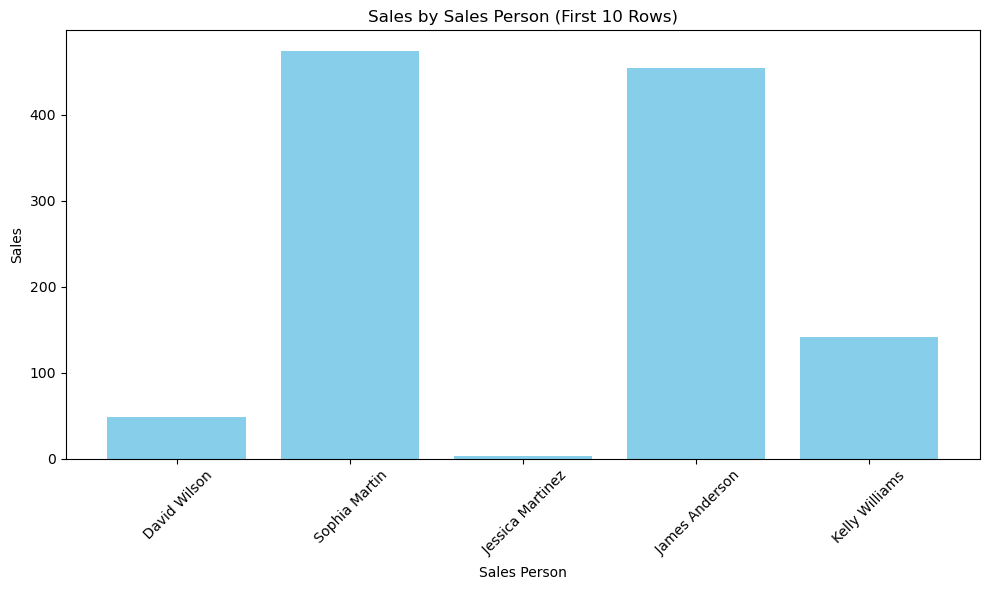

In [65]:
# Display the DataFrame
df_head = df.head()  # Ensure you get the the correct data
print(df_head)

# Check for missing values and data types
print(df_head.isnull().sum())
print(df_head.dtypes)

# Convert Sales column to numeric if necessary
df.loc[df.index[:10], 'Sales'] = pd.to_numeric(df.loc[df.index[:10], 'Sales'], errors='coerce')

# Create a bar plot for the first 10 rows
plt.figure(figsize=(10, 6))
plt.bar(df_head['Sales Person'], df_head['Sales'], color='skyblue')

# Customize the plot
plt.title('Sales by Sales Person (First 10 Rows)')
plt.xlabel('Sales Person')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

   Unique_ID Order Date O.Month       Sales Person   Region         Category  \
0          1 2024-01-01     Jan       David Wilson     East        Furniture   
1          2 2024-01-01     Jan      Sophia Martin     West        Furniture   
2          3 2024-01-01     Jan   Jessica Martinez  Central  Office Supplies   
3          4 2024-01-01     Jan     James Anderson  Central  Office Supplies   
4          5 2024-01-01     Jan     Kelly Williams  Central        Furniture   

  Sub-Category                                       Product Name    Sales  \
0  Furnishings                 Linden 10" Round Wall Clock, Black   48.896   
1  Furnishings  Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430   
2      Binders            Wilson Jones Easy Flow II Sheet Lifters    3.600   
3      Storage                      SAFCO Boltless Steel Shelving  454.560   
4  Furnishings  Tenex Carpeted, Granite-Look or Clear Contempo...  141.420   

   Quantity  ...  Product Cost Net earned   Earned

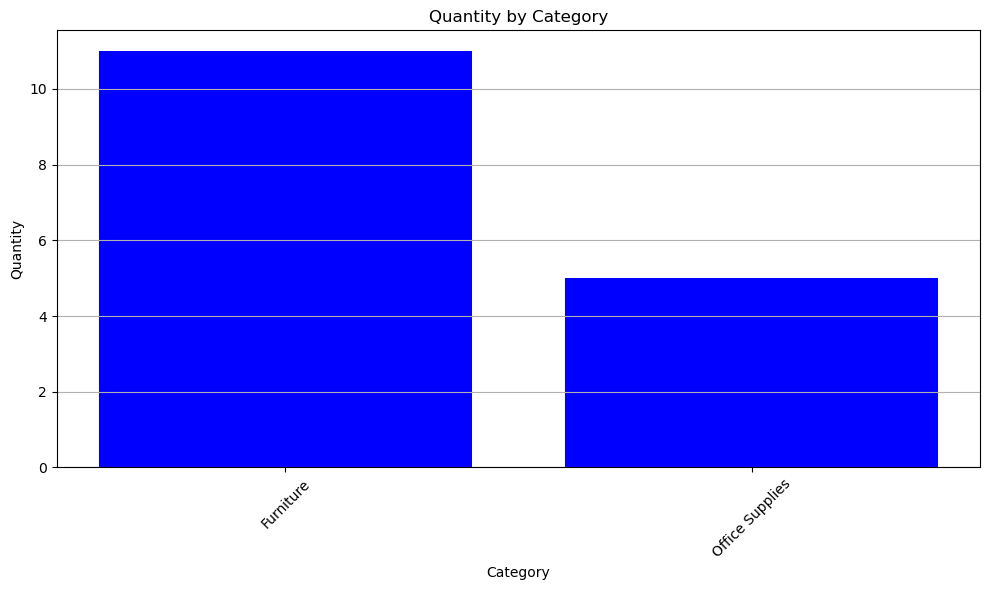

In [67]:
# Display the DataFrame
df_head = df.head()
print(df_head)

# Create a bar chart for the category data
plt.figure(figsize=(10, 6))
plt.bar(df_head['Category'], df_head['Quantity'], color='b')

# Customize the plot
plt.title('Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

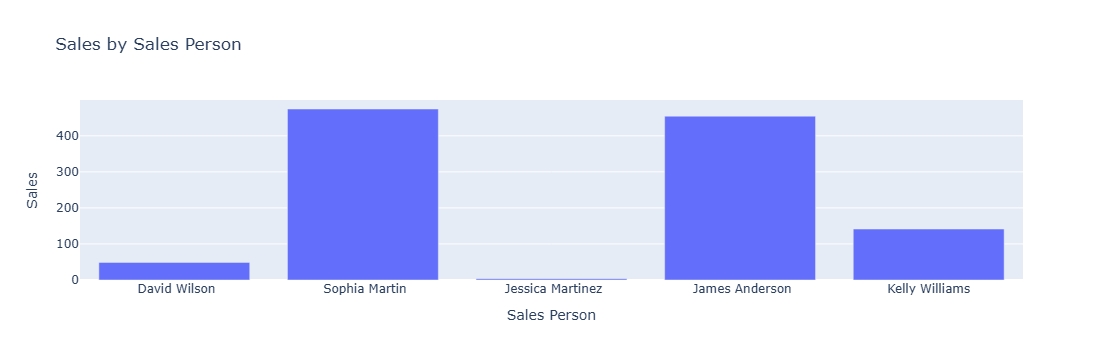

In [69]:
# Display the DataFrame
df_head = df.head()

# Create a bar plot using Plotly Graph Objects
fig = go.Figure(data=[
    go.Bar(name='Sales', x=df_head['Sales Person'], y=df_head['Sales'])
])

# Customize the layout
fig.update_layout(
    title='Sales by Sales Person',
    xaxis_title='Sales Person',
    yaxis_title='Sales',
    barmode='group'
)

# Show the plot
fig.show()

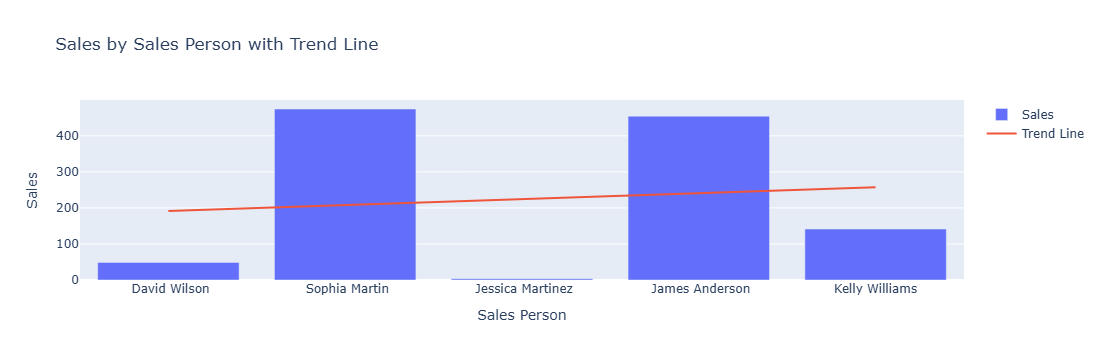

In [71]:
# Display the DataFrame
df_head = df.head()

# Create a bar plot using Plotly Graph Objects
fig = go.Figure(data=[
    go.Bar(name='Sales', x=df_head['Sales Person'], y=df_head['Sales'])
])

# Add a trend line
# Calculate the trend line
z = np.polyfit(range(len(df_head['Sales'])), df_head['Sales'], 1)
p = np.poly1d(z)

# Add the trend line to the plot
fig.add_trace(go.Scatter(x=df_head['Sales Person'], y=p(range(len(df_head['Sales']))),
                         mode='lines', name='Trend Line'))

# Customize the layout
fig.update_layout(
    title='Sales by Sales Person with Trend Line',
    xaxis_title='Sales Person',
    yaxis_title='Sales',
    barmode='group'
)

# Show the plot
fig.show()

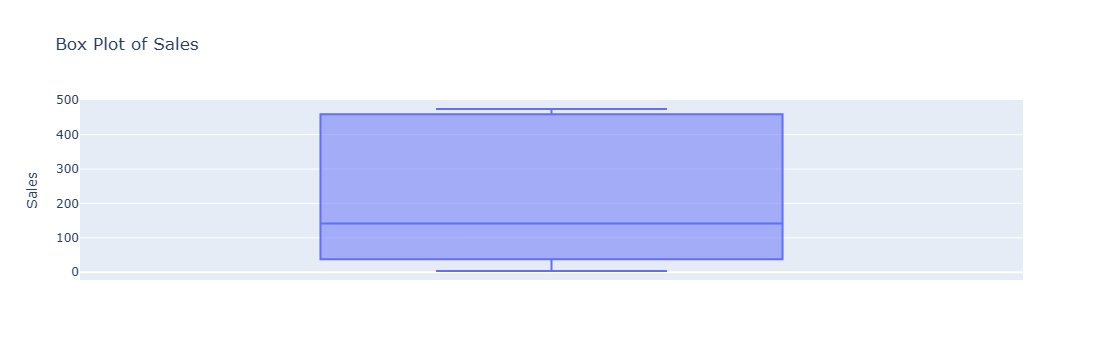

In [73]:
# Display the first 10 rows of the DataFrame
df_head = df.head()

# Create a box plot using Plotly Express
fig = px.box(df_head, y='Sales', title='Box Plot of Sales')

# Show the plot
fig.show()

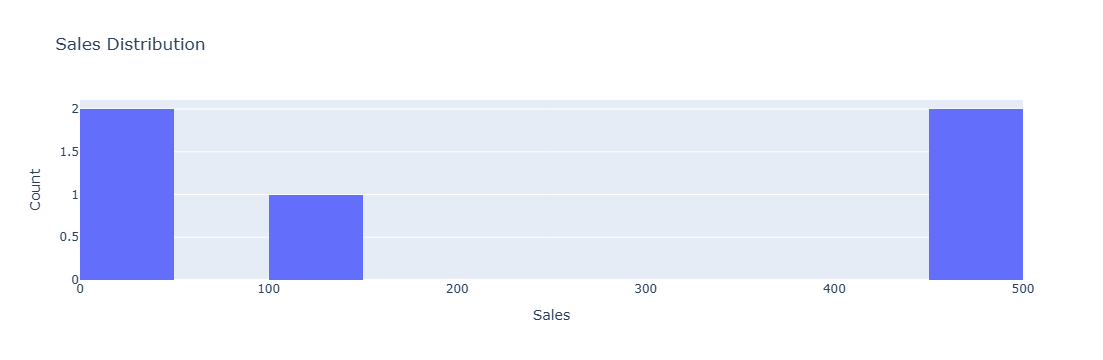

In [75]:
df_head = df.head()

# Create a histogram using Plotly Graph Objects
fig = go.Figure(data=[
    go.Histogram(x=df_head['Sales'], nbinsx=10)
])

# Customize the layout
fig.update_layout(
    title='Sales Distribution',
    xaxis_title='Sales',
    yaxis_title='Count'
)

# Show the plot
fig.show()

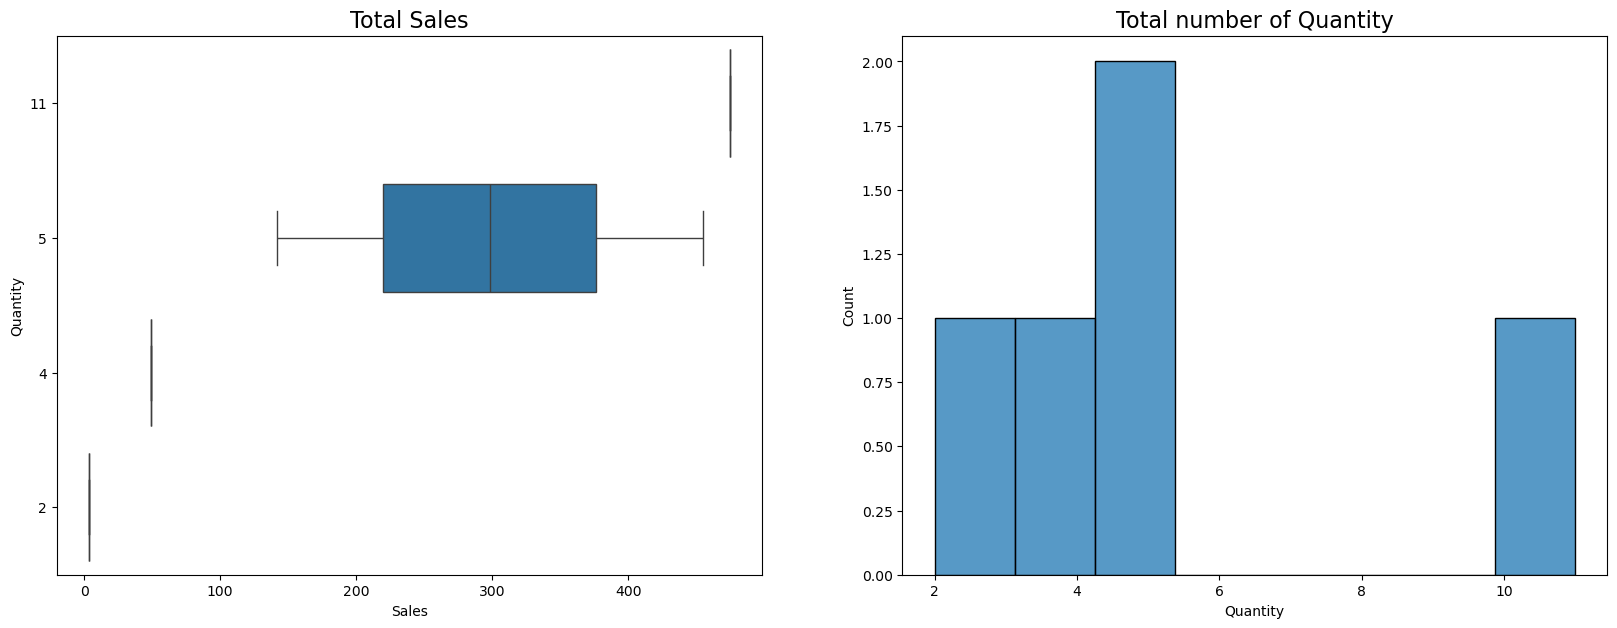

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Boxplot to check distributions of work per number of projects
sns.boxplot(data=df_head, x='Sales', y='Quantity', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Total Sales', fontsize=16)

# Distribution of number of projects
sns.histplot(data=df_head, x='Quantity', multiple='dodge', ax=ax[1])
ax[1].set_title('Total number of Quantity', fontsize=16)

plt.show()

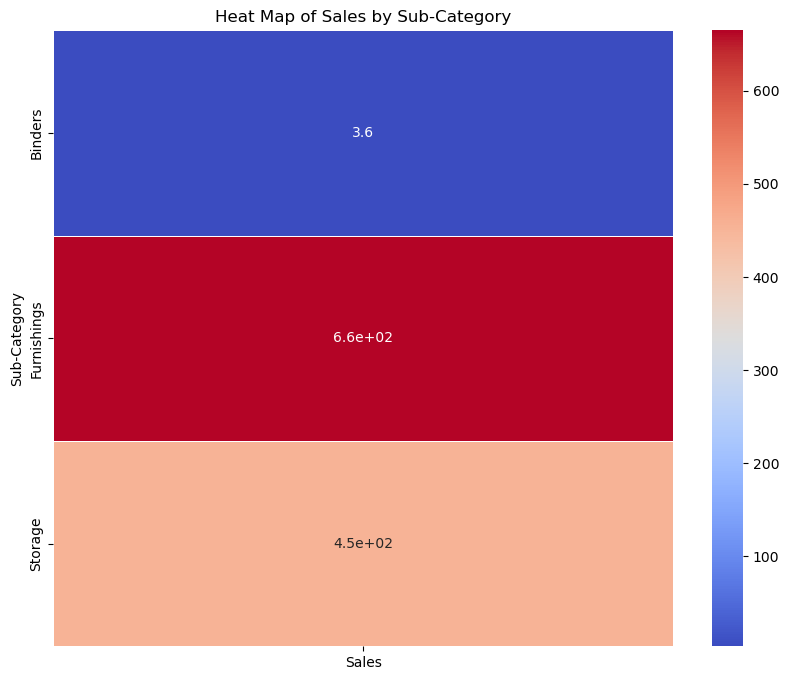

In [79]:
# Create a pivot table to aggregate the data
pivot_table = df_head.pivot_table(index='Sub-Category', values='Sales', aggfunc='sum')

# Create the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heat Map of Sales by Sub-Category')
plt.show()

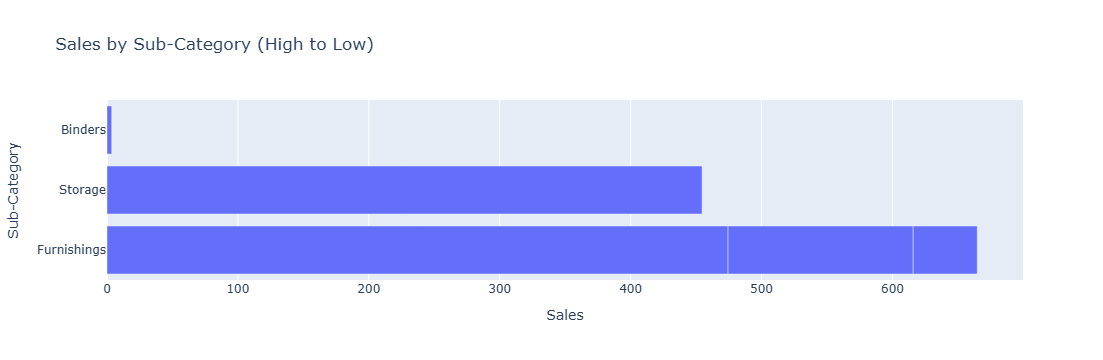

In [81]:
# Sort the DataFrame by Sales in descending order
df_sorted = df_head.sort_values(by='Sales', ascending=False)

# Create a horizontal bar plot using Plotly
fig = px.bar(df_sorted, x='Sales', y='Sub-Category', orientation='h',
             title='Sales by Sub-Category (High to Low)',
             labels={'Sales': 'Sales', 'Sub-Category': 'Sub-Category'})

# Show the plot
fig.show()

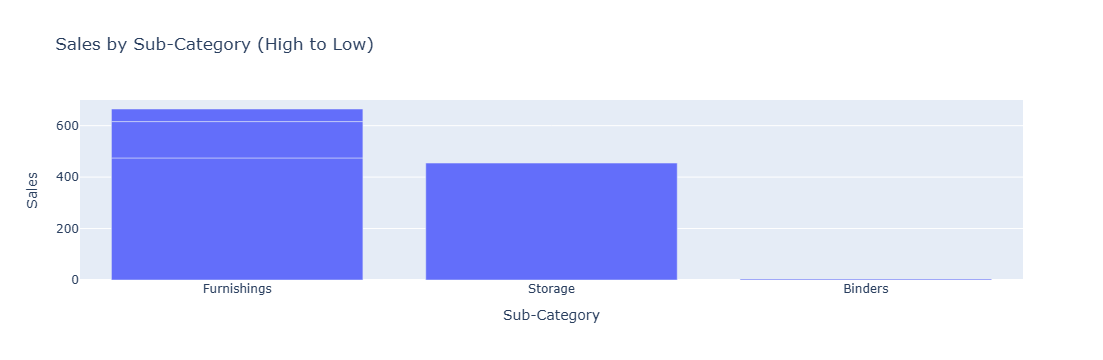

In [83]:
# Sort the DataFrame by Sales in descending order
df_sorted = df_head.sort_values(by='Sales', ascending=False)

# Create a bar plot using Plotly
fig = px.bar(df_sorted, x='Sub-Category', y='Sales',
             title='Sales by Sub-Category (High to Low)',
             labels={'Sales': 'Sales', 'Sub-Category': 'Sub-Category'})

# Show the plot
fig.show()

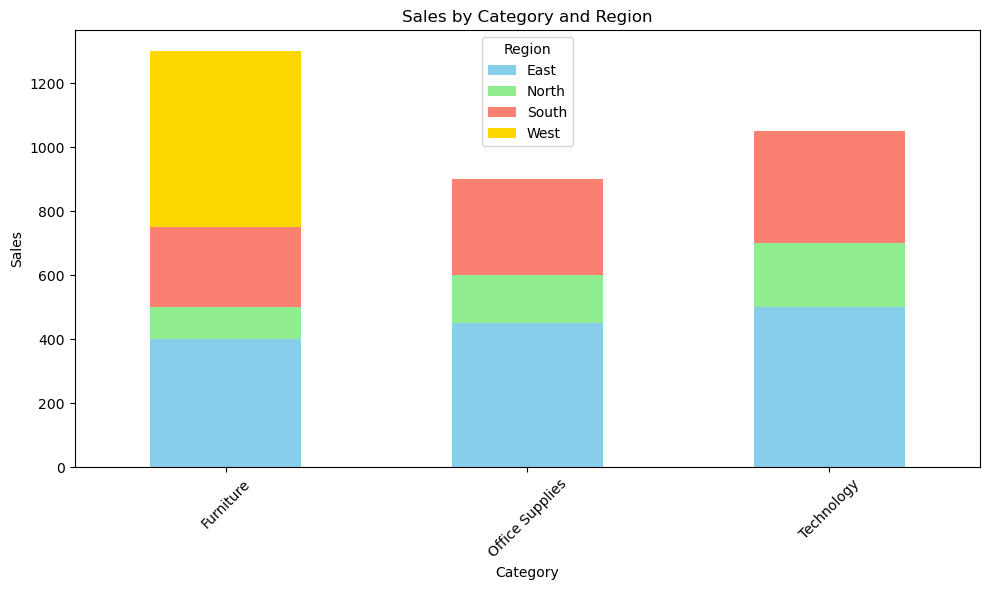

In [85]:
# Sample data for demonstration
data = {
    'Category': ['Furniture', 'Office Supplies', 'Technology', 'Furniture', 'Office Supplies', 'Technology', 'Furniture', 'Office Supplies', 'Technology', 'Furniture'],
    'Region': ['North', 'North', 'North', 'South', 'South', 'South', 'East', 'East', 'East', 'West'],
    'Sales': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
}

# Create a DataFrame
df_head = pd.DataFrame(data)

# Group by Category and Region, then sum the Sales
grouped_data = df_head.groupby(['Category', 'Region'])['Sales'].sum().unstack()

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon', 'gold'])

# Customize the plot
plt.title('Sales by Category and Region')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

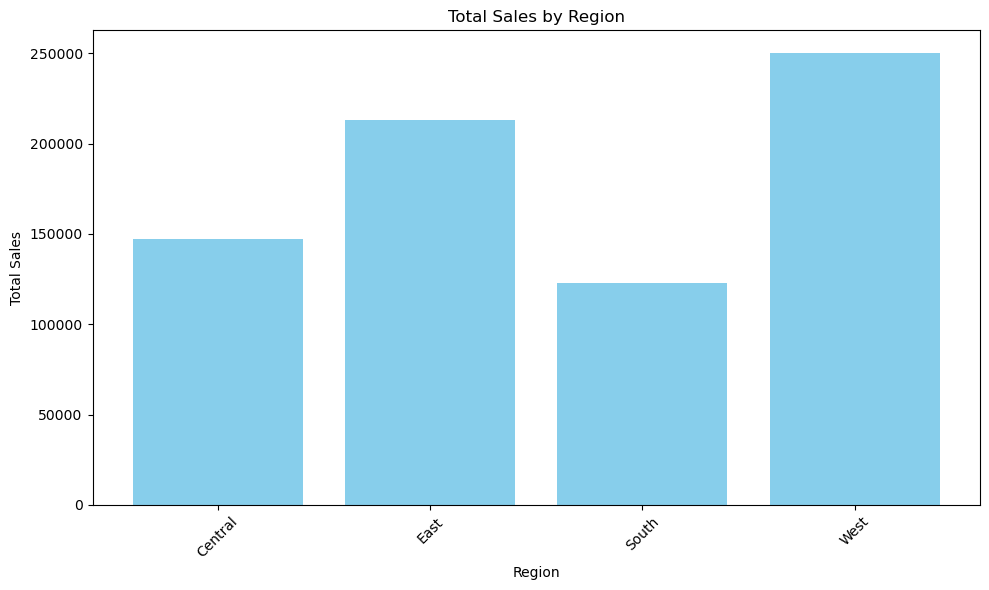

In [87]:
# Group by Region and sum the Sales
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(region_sales['Region'], region_sales['Sales'], color='skyblue')

# Customize the plot
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

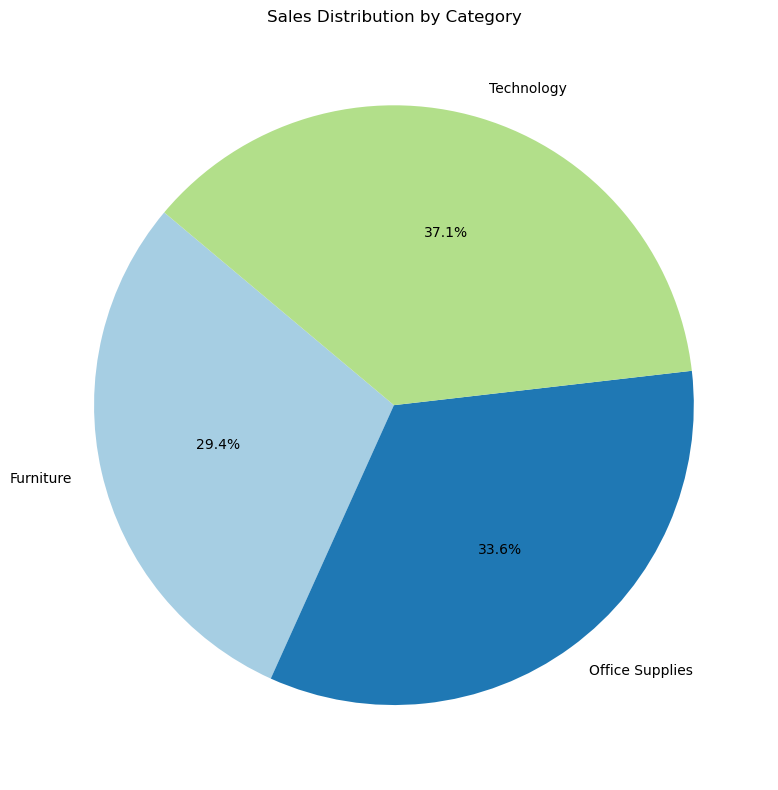

In [89]:
# Group by Category and sum the Sales
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Customize the plot
plt.title('Sales Distribution by Category')
plt.tight_layout()

# Show the plot
plt.show()


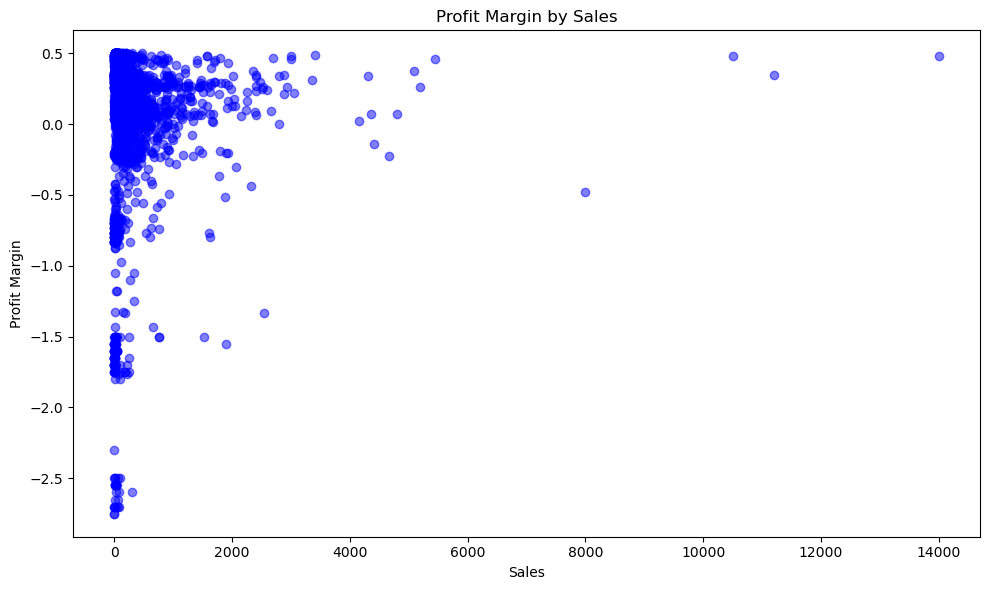

In [91]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit Margin'], c='blue', alpha=0.5)

# Customize the plot
plt.title('Profit Margin by Sales')
plt.xlabel('Sales')
plt.ylabel('Profit Margin')
plt.tight_layout()

# Show the plot
plt.show()

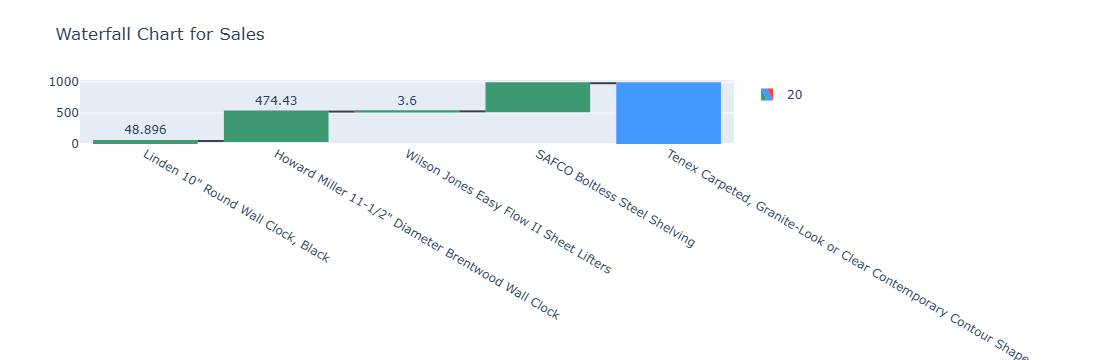

In [93]:
import pandas as pd


# Define the file path
file_path = r'C:\Users\todd-\OneDrive\Desktop\todd\Excel Templates\Shop_Sales_DB-No VBA.csv'

# Read the CSV file into a DataFrame with the specified encoding
df = pd.read_csv(file_path, encoding='latin1')

# Display the first 10 rows of the DataFrame
df_head = df.head()

# Create a waterfall chart
fig = go.Figure(go.Waterfall(
    name="20", orientation="v",
    measure=["relative", "relative", "relative", "relative", "total"],
    x=df_head['Product Name'],
    y=df_head['Sales'],
    textposition="outside",
    text=df_head['Sales'],
    connector={"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
    title="Waterfall Chart for Sales",
    showlegend=True
)

fig.show()

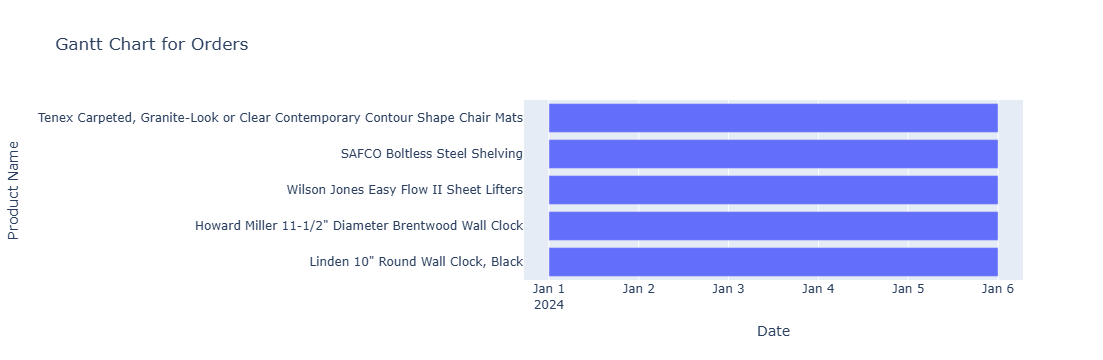

In [44]:
# Define the file path
file_path = r'C:\Users\todd-\OneDrive\Desktop\todd\Excel Templates\Shop_Sales_DB-No VBA.csv'

# Read the CSV file into a DataFrame with the specified encoding
df = pd.read_csv(file_path, encoding='latin1')

# Display the first 10 rows of the DataFrame
df_head = df.head().copy()  # Create a copy of the DataFrame slice

# Convert 'Order Date' to datetime
df_head['Order Date'] = pd.to_datetime(df_head['Order Date'])

# Add a 'Duration' column (for example, let's assume each task takes 5 days)
df_head['Duration'] = 5

# Create a 'Finish Date' column
df_head['Finish Date'] = df_head['Order Date'] + pd.to_timedelta(df_head['Duration'], unit='d')

# Create a Gantt chart
fig = px.timeline(df_head, x_start='Order Date', x_end='Finish Date', y='Product Name', title='Gantt Chart for Orders')

# Update layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Product Name',
    showlegend=False
)

fig.show()

In [97]:
# Preprocessing
# Convert categorical columns to numerical using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(['Sales'], axis=1)  # Features
y = df['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the first few rows of the DataFrame for testing
print(df.head())

Mean Squared Error: 33903.75095527618
   Unique_ID  Order Date  O.Month  Sales Person  Region  Category  \
0          1           0        4             2       1         0   
1          2           0        4            14       3         0   
2          3           0        4             5       0         1   
3          4           0        4             4       0         1   
4          5           0        4            18       0         0   

   Sub-Category  Product Name    Sales  Quantity  ...  Price per unit  \
0             9           819   48.896         4  ...             269   
1             9           722  474.430        11  ...            1138   
2             3          1332    3.600         2  ...              75   
3            14          1120  454.560         5  ...             119   
4             9          1255  141.420         5  ...             879   

   Product Cost  Net earned   Earned Pct  Commission Pct  Commission  \
0           209          712        